---

title: "中餐馆过程"
date: 2024-11-27
author: 郝鸿涛
slug: crp
draft: false
toc: true
tags: 统计

---

## 定义

假设一家中餐馆有无限张桌子，标号为 1，2，3...。每张桌子容纳的人数没有限制。顾客依次进入餐馆，选择一张桌子坐下来：

- 选择现有的桌子的概率与桌上已有人数成正比。
- 选择新开一个桌子的概率与参数 $\alpha$ 成正比。

假设：

- $n_k$: 当前第 $k$ 张现有桌子上的顾客总数。
- $N$: 当前顾客总数
- $\alpha$: 表示新开桌子的倾向

那么，第 $N+1$ 位顾客选择桌子的概率为：

- 已有桌子 $k$: $P_k = \frac{n_k}{N+\alpha}$

- 新桌子：$P_{\text{new}} = \frac{\alpha}{N+\alpha}$

## 代码实现

In [89]:
import numpy as np 
import matplotlib.pyplot as plt 

def crp(n, alpha):
    tables = []

    for i in range(n):
        # the ith customer (starts from 0), also the total number of seated customers now
        if i == 0:
            tables.append(1)
        else:
            choices = np.arange(1, max(tables)+2)
            # np.bincount will start from table 0 till the max
            # we do not need table 0
            n_k = np.bincount(tables)[1:]
            probs = [c/(i+alpha) for c in n_k] + [alpha/(i+alpha)]
            choice = np.random.choice(choices, p = probs)
            tables.append(choice)
    return tables

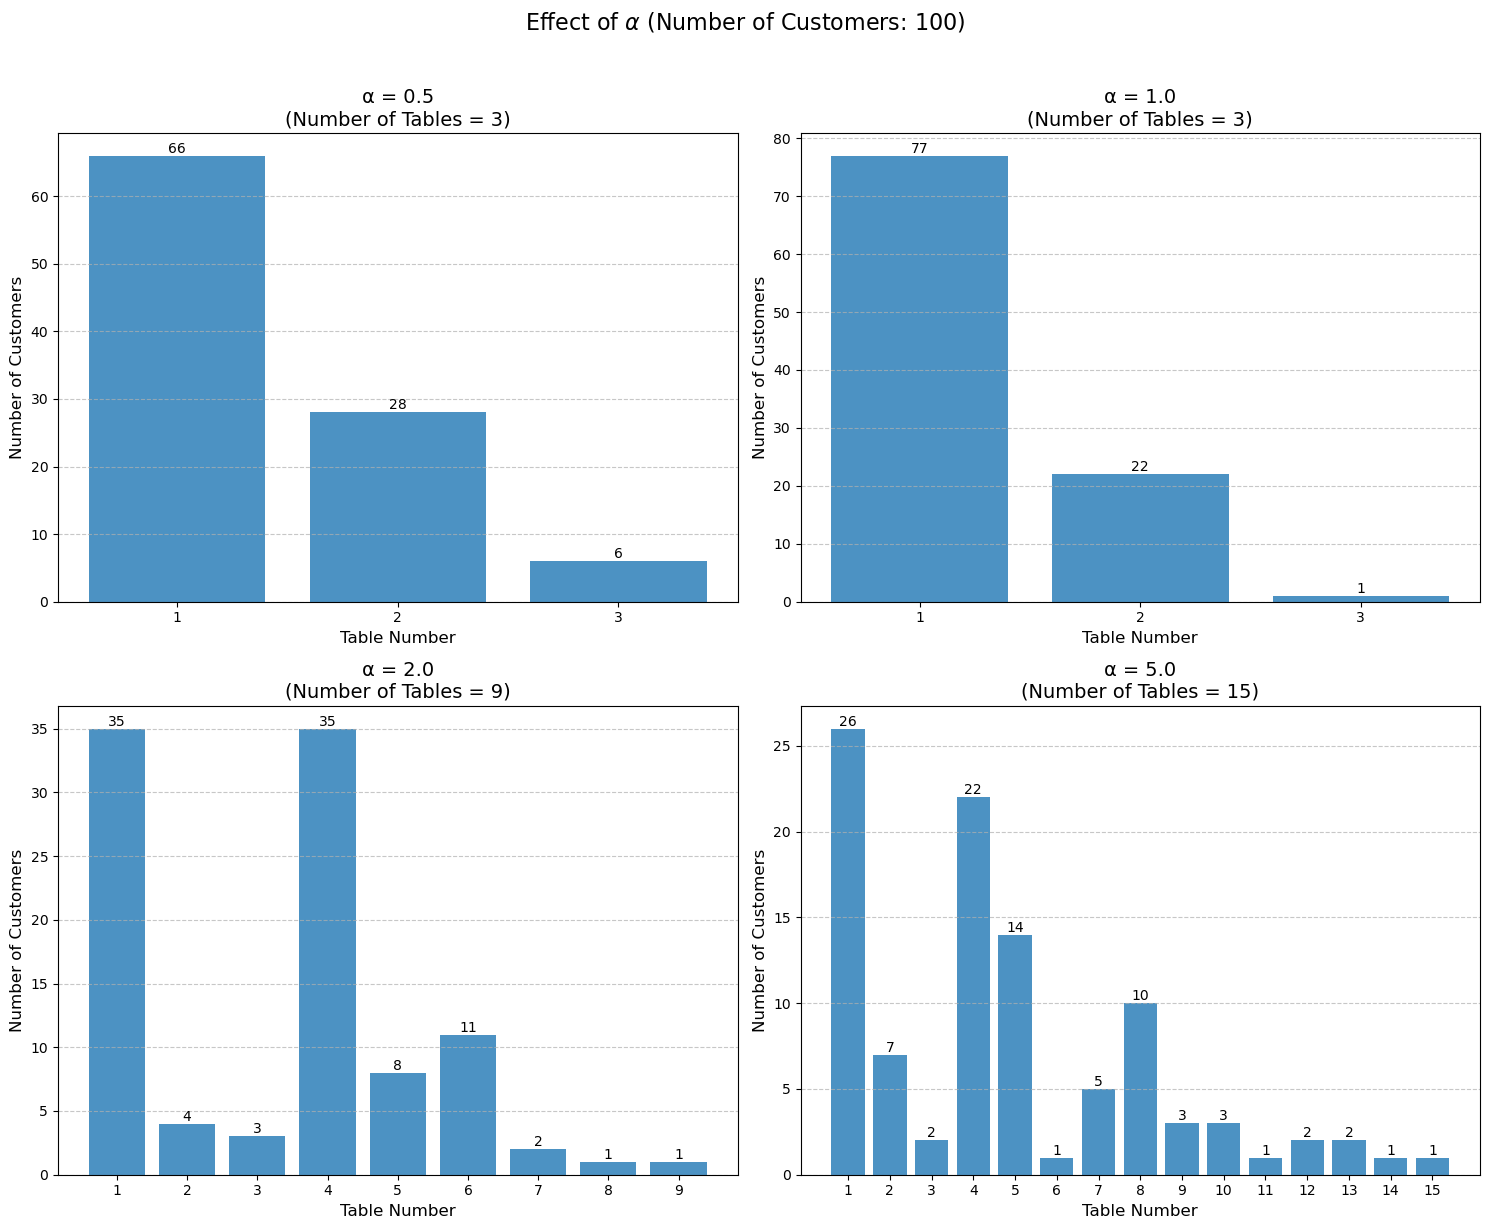

In [90]:
#| code-fold:true

# Test different alphas
alphas = [0.5, 1.0, 2.0, 5.0]
num_customers = 100

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

# Set random seed for reproducibility
np.random.seed(42)

for idx, alpha in enumerate(alphas):
    # Run simulation
    table_assignments = crp(num_customers, alpha)
    
    # Count customers per table
    table_counts = np.bincount(table_assignments)[1:]  # Skip index 0
    
    # Create histogram
    axes[idx].bar(range(1, len(table_counts) + 1), table_counts, alpha=0.8)

    # Set integer ticks on x-axis
    x_ticks = np.arange(1, len(table_counts) + 1)
    axes[idx].set_xticks(x_ticks)
    axes[idx].set_xticklabels(x_ticks.astype(int))
    
    # Add labels and title
    axes[idx].set_xlabel('Table Number', fontsize=12)
    axes[idx].set_ylabel('Number of Customers', fontsize=12)
    axes[idx].set_title(f'α = {alpha}\n(Number of Tables = {len(set(table_assignments))})', 
                        fontsize=14)
    
    # Add grid
    axes[idx].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add customer counts above bars
    for i, count in enumerate(table_counts):
        if count > 0:  # Only show non-zero counts
            axes[idx].text(i+1, count, str(count), ha='center', va='bottom')

plt.suptitle(rf'Effect of $\alpha$ (Number of Customers: {num_customers})', 
             fontsize=16, 
             y=1.02)
plt.tight_layout()
plt.show()

## 联合概率

假如有 10 名顾客，中餐馆过程的结果如下：

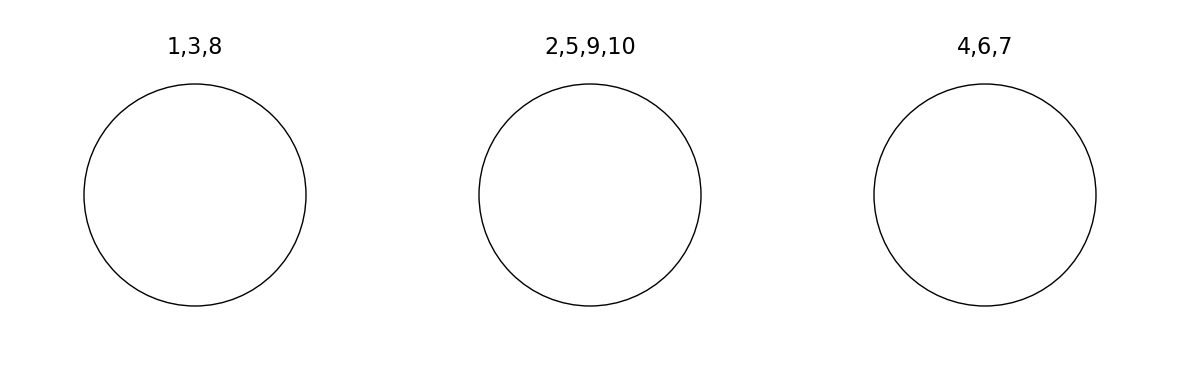

In [91]:
#| code-fold:true

import matplotlib.pyplot as plt
import numpy as np

# Create figure
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Data for each circle
data = ["1,3,8", "2,5,9,10", "4,6,7"]

# Plot each circle
for i, ax in enumerate(axes):
    # Create circle
    circle = plt.Circle((0.5, 0.5), 0.3, fill=False)
    ax.add_artist(circle)
    
    # Add text above circle
    ax.text(0.5, 0.9, data[i], ha='center', va='center', fontsize = 16)
    
    # Set equal aspect ratio and limits
    ax.set_aspect('equal')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    
    # Remove axes
    ax.axis('off')

plt.tight_layout()
plt.show()

请问该结果的概率为多少？

$$
\begin{aligned}
\Pr(z_1, \dots, z_{10}) &= \Pr(z_1) \Pr(z_2 \mid z_1) \dots \Pr(z_{10} \mid z_1, \dots, z_9) \\
&= \frac{\alpha}{\alpha} \frac{\alpha}{1+\alpha} \frac{1}{2+\alpha} \frac{\alpha}{3+\alpha} \frac{1}{4+\alpha} \frac{1}{5+\alpha} \frac{2}{6+\alpha} \frac{2}{7+\alpha} \frac{2}{8+\alpha} \frac{3}{9+\alpha}
\end{aligned}
$$

## 参考资料

- [COS 597C: Bayesian nonparametrics by David Blei](https://www.cs.princeton.edu/courses/archive/fall07/cos597C/scribe/20070921.pdf)